>Instituto de Informática  <br>
Nome da/do estudante <br>
### Universidade Federal de Goiás <br>
### **Inteligência Artificial Aplicada a Saúde** <br>

# Câncer Cervical

#### **Lê o conjunto de dados e os estrutura em diferentes variáveis**

In [1]:
#fazendo download do dataset, de maneira local 
!gdown --id 1L_tE_lrW-qSQK1FKBnol2VEJ1Yv8krsh # treinamento
!gdown --id 125xeEzDcAOKQWHWrXYG6-Lm5IOORoj5Y # teste
!gdown --id 1K_BxPAJMUMdkWhRx1D2gbnQxHOz5Kq34 # todo o df
#!gdown --id 1J-XUzcsIfbcAH3hiZHcTD1avQRgb6qt6 # ytest (uso opcional)

/usr/local/lib/python3.8/dist-packages/gdown/cli.py:127: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1L_tE_lrW-qSQK1FKBnol2VEJ1Yv8krsh
To: /content/Treinamento.csv
100% 3.04k/3.04k [00:00<00:00, 4.27MB/s]
/usr/local/lib/python3.8/dist-packages/gdown/cli.py:127: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=125xeEzDcAOKQWHWrXYG6-Lm5IOORoj5Y
To: /content/Teste.csv
100% 1.49k/1.49k [00:00<00:00, 2.10MB/s]
/usr/local/lib/python3.8/dist-packages/gdown/cli.py:127: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?

In [2]:
import os, sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

# Definir o caminho onde o dataset se encontra
path_train = '/content/Treinamento.csv'
path_test = '/content/Teste.csv'
#path_idx_normal = '' ### uso opcional

# Carregar dataset 
xtrain = pd.read_csv(path_train)
xtest = pd.read_csv(path_test)
#idx_normal = pd.read_csv(path_idx_normal)

# Separar y referencia
ytest = xtest['ca_cervix']
ytrain = xtrain['ca_cervix']

# Remover y do conjunto de treino
xtest = xtest.drop(columns=['ca_cervix'])
xtrain = xtrain.drop(columns=['ca_cervix'])

In [3]:
# QUANTIDADE DE DADOS
# y == 1 | representa com câncer
# y == 0 | representa sem câncer


# dataset de treino
print("**Dataset de treino**")
print("Sem câncer:", len(np.where(ytrain == 0)[0]))
print("Com câncer:", len(np.where(ytrain == 1)[0]))

print('-'*15)
# dataset de teste
print("**Dataset de teste**")
print("Sem câncer:", len(np.where(ytest == 0)[0]))
print("Com câncer:", len(np.where(ytest == 1)[0]))

**Dataset de treino**
Sem câncer: 36
Com câncer: 15
---------------
**Dataset de teste**
Sem câncer: 15
Com câncer: 6


## **REGRESSÃO LINEAR MÚLTIPLA**

#### **TREINO**

In [4]:
from sklearn import linear_model as lm

# Carregar modelo de regressão linear
lm = lm.LinearRegression()

# Gerar coeficientes com base no conjunto de treinamento
model = lm.fit(xtrain,ytrain) # cálculo de b (treinamento)

#### **TESTE**

In [5]:
# predições para nossos dados de teste (predição num intervalo contínuo, não apenas 0 e 1)
ypredicted_rlm = lm.predict(xtest)

# ypredicted_rlm possui uma predição num intervalo contínuo. Vamos discretizar assim: 1 se o valor for > 0.5, se não 0
ypredicted = [1 if predict > 0.5 else 0 for predict in ypredicted_rlm]

print(f"Antes de discretizar: {ypredicted_rlm[0]}")
print(f"Depois de discretizar: {ypredicted[0]}")

Antes de discretizar: 1.1414069776764577
Depois de discretizar: 1


In [6]:
# Quantidade de pacientes sem câncer e com câncer de acordo com a classificação via km
unique, counts = np.unique(ypredicted, return_counts=True)
print(np.asarray((unique, counts)).T)

[[ 0 15]
 [ 1  6]]


#### **Averiguação do modelo**

In [7]:
def get_results(ytest, ypredicted):
  # Verdadeiro positivo: com câncer, modelo prediz com câncer
  # Verdadeiro negativo: sem câncer, modelo prediz sem câncer
  # Falso positivo: sem câncer, modelo prediz com câncer
  # Falso negativo: com câncer, modelo sem câncer

  results = []
  for esperado, predito in zip(ytest, ypredicted):
    
    # o modelo acertou a predição
    if esperado == predito:
      if predito == 1: # a predição foi com câncer (positivo)
        result = "TP" # True Positive
    
      else: # a predição foi sem câncer (negativo)
        result = "TN" # True Negative
    
    # o modelo errou a predição
    else:
        if predito == 1: # a predição foi com câncer (positivo)
          result = "FP" # False Positive
    
        else: # a predição era sem câncer (negativo)
          result = "FN" # False Negative

    results.append(result)
  return results


results = get_results(ytest.values, ypredicted)

# mostrando as 10 primeiras respostas
print(results[:10])

['TP', 'FP', 'TN', 'TN', 'TP', 'TN', 'TN', 'TN', 'TN', 'TP']


In [8]:
# obtendo os index das amostras que a prediçãod o modelo resultou em TP, TN, FP e FN
index_TP = [i for i, val in enumerate(results) if val == 'TP']
index_TN = [i for i, val in enumerate(results) if val == 'TN']
index_FP = [i for i, val in enumerate(results) if val == 'FP']
index_FN = [i for i, val in enumerate(results) if val == 'FN']

In [9]:
from sklearn.metrics import confusion_matrix
# podemos plotar a matriz de confusão de uma maneira simples com o sklearn
# e comparar com os resultados que já obtivemos de TP, TN, FP e FN

print('MATRIZ DE CONFUSÃO')
print(confusion_matrix(ytest, ypredicted))
print('---')

print("Verdadeiro positivo: ", len(index_TP))
print("Verdadeiro negativo: ", len(index_TN))
print("Falso positivo: ", len(index_FP))
print("Falso negativo: ", len(index_FN))

MATRIZ DE CONFUSÃO
[[14  1]
 [ 1  5]]
---
Verdadeiro positivo:  5
Verdadeiro negativo:  14
Falso positivo:  1
Falso negativo:  1


In [10]:
# Metricas
from sklearn.metrics import mean_absolute_error as mae


acuracia = (len(index_TP) + len(index_TN))/len(ytest)
mae_train = mae(ytrain, lm.predict(xtrain))
mae_test = mae(ytest, lm.predict(xtest))


print(f"Acuracia: {acuracia}")
print(f"Erro absoluto médio - Dados de treino: {mae_train}")
print(f"Erro absoluto médio - Dados de teste: {mae_test}")

Acuracia: 0.9047619047619048
Erro absoluto médio - Dados de treino: 0.2032598782766279
Erro absoluto médio - Dados de teste: 0.2846883400547598


#### **PLOTANDO O GRÁFICO**

In [25]:
aux = np.array([[0.5]])

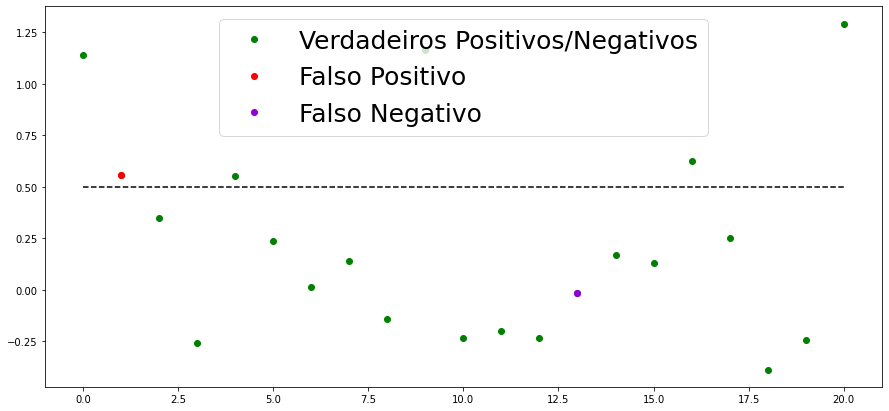

In [26]:
fig, axs = plt.subplots(1, # Gerar apenas uma figura 
                        figsize=(15, 7) # Tamanho da figura
                        )

# plotar y predito com a representação de circulos azuis
axs.plot(ypredicted_rlm , 'bo', color='green', label="Verdadeiros Positivos/Negativos")
#xs.set_title('RESULTADO REGRESSÃO LINEAR MÚLTIPLA PARA CLASSIFICAÇÃO', fontsize=20)


# plotar limiar definido para classificação, tudo acima de 0.5 é 1, abaixo de 0.5 é 0
axs.plot(np.repeat(aux, ypredicted_rlm.shape[0], axis=0), # plotar eixo x (limiar do problema)
         color='black', # Definir cor da linha
         linestyle='dashed', # Definir estilo da linha
         )

# plotar erros cometidos pelo modelo de regressão
axs.plot(index_FP, ypredicted_rlm[index_FP], 
         'o', # definir pontos pra marcar erros
         color='red', # cor dos Falsos Positivos
         label='Falso Positivo'
         )

# plotar erros cometidos pelo modelo de regressão
axs.plot(index_FN, ypredicted_rlm[index_FN], 
         'o', # definir pontos pretos pra marcar erros
         color="darkviolet", # cor dos Falsos Negativos
         label='Falso Negativo'
         )

plt.legend(fontsize=25)
plt.show()